---
# YAML data for Mercury App
title: Prediction using XGBoost
description: Stock Market Prediction using XGBoost method
show-code: True
author: Anurag M Bagde
show-prompt: True
---

In [1]:
# Done by Anurag M Bagde (2019506120)

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [19]:
import yfinance as yf
def download_stock(stock):
    df = yf.download(
        [stock],
        start="2010-01-01",
        end="2024-01-01",
        group_by="ticker",
        progress=False
    )
    df.round(4)
    return df
apple_stocks = download_stock("AAPL")
apple_stocks.dropna(inplace=True)
apple_stocks.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [20]:
def create_moving_average(df, moving_average_days=[50, 100, 200]):
  for moving_average in moving_average_days:
    for company in df:
      column_name = f'MA{moving_average}'
      df[column_name] = df["Close"].rolling(moving_average).mean()
  return df.iloc[max(moving_average_days):]
apple_stocks = create_moving_average(apple_stocks)
apple_stocks

,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200
Date,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.357644,1232784000,9.693457,9.463275,8.784248
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.389090,721624400,9.729971,9.482436,8.801418
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.358554,551460000,9.772350,9.499825,8.819016
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.296565,372778000,9.812121,9.515368,8.836318
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.337993,392462000,9.854793,9.531696,8.853614
...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,185.398801,181.768301,178.649100
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,185.682801,181.787101,178.871851
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,185.971400,181.898701,179.085250


In [21]:
!pip install ta
from ta.momentum import RSIIndicator
rsi = RSIIndicator(close=apple_stocks["Close"])
apple_stocks['rsi'] = rsi.rsi()
apple_stocks

<ipython-input-21-12f78aae9cdc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks['rsi'] = rsi.rsi()


,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200,rsi
Date,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.357644,1232784000,9.693457,9.463275,8.784248,NaN
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.389090,721624400,9.729971,9.482436,8.801418,NaN
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.358554,551460000,9.772350,9.499825,8.819016,NaN
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.296565,372778000,9.812121,9.515368,8.836318,NaN
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.337993,392462000,9.854793,9.531696,8.853614,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,185.398801,181.768301,178.649100,54.609714
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,185.682801,181.787101,178.871851,53.026883
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,185.971400,181.898701,179.085250,53.291938


In [22]:
# pct change based on Adj close value
apple_stocks["Pct_change"] = apple_stocks["Adj Close"].pct_change()

# Drop null values
apple_stocks.dropna(inplace = True)
apple_stocks.head()

<ipython-input-22-09ae79a6ab2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks["Pct_change"] = apple_stocks["Adj Close"].pct_change()
<ipython-input-22-09ae79a6ab2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks.dropna(inplace = True)


,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200,rsi,Pct_change
Date,,,,,,,,,,,
2010-11-05,11.356786,11.413214,11.312500,11.326071,9.588645,361253200,10.256750,9.709971,9.015652,67.003232,-0.003582
2010-11-08,11.328571,11.420357,11.312857,11.379286,9.633698,281758400,10.311750,9.726668,9.036286,69.117763,0.004699
2010-11-09,11.466071,11.475000,11.232143,11.288571,9.556897,383544000,10.364307,9.741671,9.055954,61.842382,-0.007972
2010-11-10,11.308571,11.384643,11.198214,11.358214,9.615859,384227200,10.417829,9.758764,9.075623,64.897253,0.006170
2010-11-11,11.250000,11.371429,11.223214,11.308929,9.574134,361284000,10.465200,9.774050,9.096580,61.165285,-0.004339


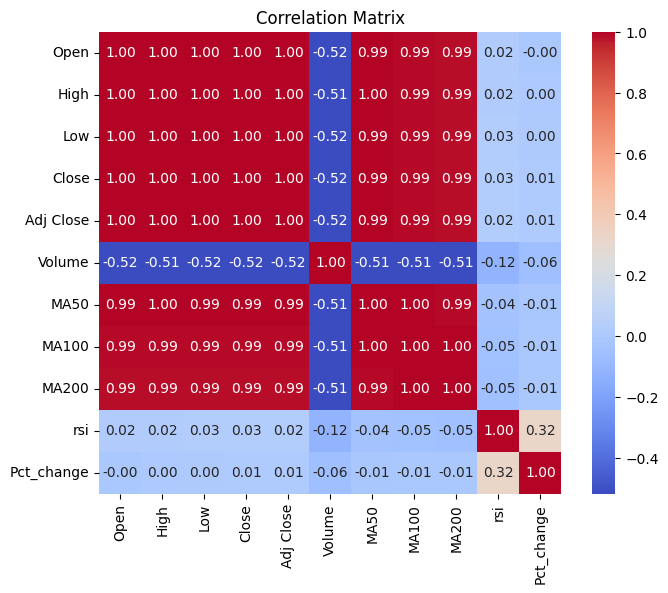

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = apple_stocks.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Dataframe with Adj close, ts_polarity, twitter_volume of APPL
apple_stocks = apple_stocks[["Adj Close", "rsi", "Volume", "MA200", "Pct_change"]]
apple_stocks.head()

,Adj Close,rsi,Volume,MA200,Pct_change
Date,,,,,
2010-11-05,9.588645,67.003232,361253200,9.015652,-0.003582
2010-11-08,9.633698,69.117763,281758400,9.036286,0.004699
2010-11-09,9.556897,61.842382,383544000,9.055954,-0.007972
2010-11-10,9.615859,64.897253,384227200,9.075623,0.006170
2010-11-11,9.574134,61.165285,361284000,9.096580,-0.004339


In [25]:
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, feature_col_number4, feature_col_number5, target_col_number):
    # Create empty lists "X_adj_close", "rsi", "X_volume" and y
    X_adj_close = []
    X_rsi = []
    X_ma200 = []
    X_volume = []
    X_pct_change = []
    y = []
    for i in range(len(df) - window):
        adj_close = df.iloc[i:(i + window), feature_col_number1]
        rsi = df.iloc[i:(i + window), feature_col_number2]
        volume = df.iloc[i:(i + window), feature_col_number3]
        ma_200 = df.iloc[i:(i + window), feature_col_number4]
        pct_change = df.iloc[i:(i + window), feature_col_number5]
        target = df.iloc[(i + window), target_col_number]

        # Append values in the lists
        X_adj_close.append(adj_close)
        X_rsi.append(rsi)
        X_volume.append(volume)
        X_ma200.append(ma_200)
        X_pct_change.append(pct_change)
        y.append(target)

    return np.hstack((X_adj_close, X_rsi, X_volume, X_ma200, X_pct_change)), np.array(y).reshape(-1, 1)

In [26]:
window_size = 3
X, y = window_data(apple_stocks, window_size, 0, 1, 2, 3, 4, 0)
X, y

(array([[ 9.58864498e+00,  9.63369751e+00,  9.55689716e+00, ...,
         -3.58215676e-03,  4.69852919e-03, -7.97205292e-03],
        [ 9.63369751e+00,  9.55689716e+00,  9.61585903e+00, ...,
          4.69852919e-03, -7.97205292e-03,  6.16956186e-03],
        [ 9.55689716e+00,  9.61585903e+00,  9.57413387e+00, ...,
         -7.97205292e-03,  6.16956186e-03, -4.33920241e-03],
        ...,
        [ 1.94431885e+02,  1.93353287e+02,  1.92803986e+02, ...,
         -7.69990402e-04, -5.54743387e-03, -2.84091963e-03],
        [ 1.93353287e+02,  1.92803986e+02,  1.92903839e+02, ...,
         -5.54743387e-03, -2.84091963e-03,  5.17901719e-04],
        [ 1.92803986e+02,  1.92903839e+02,  1.93333298e+02, ...,
         -2.84091963e-03,  5.17901719e-04,  2.22628342e-03]]),
 array([[  9.61585903],
        [  9.57413387],
        [  9.31350327],
        ...,
        [192.90383911],
        [193.33329773],
        [192.28463745]]))

In [27]:
# Use 70% of the data for training and 30% for testing
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(y))

# Set X_train, X_test, y_train, t_test
X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

**Scaling Data with MinMax scaler!**

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

model = XGBRegressor(objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters, cv=5, verbose=False)

In [40]:
# Fit the model
clf.fit(X_train, y_train.ravel())

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:13:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:13:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:13:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:13:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:13:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "

Best params: {'gamma': 0.001, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'random_state': 42}
Best validation score = 0.5211393033537588


**Model performance**

In [41]:
# best model
model = XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
predicted = model.predict(X_test)
predicted

array([0.1585025 , 0.16024718, 0.16024718, 0.14431451, 0.15772419,
       0.1655353 , 0.16542976, 0.14431451, 0.14256984, 0.15772419,
       0.16347285, 0.17012142, 0.16377196, 0.16598758, 0.16189674,
       0.17407542, 0.17012142, 0.17138591, 0.16316123, 0.16699336,
       0.16377196, 0.15537989, 0.12747204, 0.11237586, 0.1149037 ,
       0.08936156, 0.08831534, 0.11977364, 0.10809141, 0.12977023,
       0.11859488, 0.11200881, 0.07258863, 0.10491353, 0.08698913,
       0.04207335, 0.0839575 , 0.03166188, 0.03909003, 0.03353757,
       0.03090138, 0.01569637, 0.01308175, 0.03031852, 0.03230152,
       0.04906181, 0.03590205, 0.04752904, 0.04796129, 0.02865422,
       0.02959733, 0.02811642, 0.05421164, 0.05280989, 0.06685052,
       0.07152158, 0.08487978, 0.10295654, 0.10151796, 0.10664313,
       0.10029554, 0.09118957, 0.07440699, 0.08699044, 0.08492105,
       0.09675574, 0.09717809, 0.09053388, 0.10609297, 0.11409261,
       0.11108416, 0.11804654, 0.12318405, 0.13050663, 0.13185

In [43]:
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

Root Mean Squared Error: 0.04655940725247959
R-squared : 0.9592176741574687


In [44]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [45]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = apple_stocks.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
Date,,
2020-01-23,77.651932,77.396713
2020-01-24,77.428154,77.646461
2020-01-27,75.151360,77.646461
2020-01-28,77.277336,75.365692
2020-01-29,78.894920,77.285294


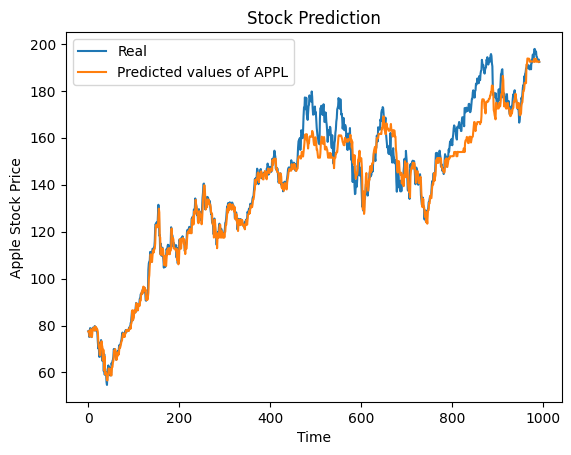

In [46]:
# Plot the real vs predicted values as a line chart
#stocks.hvplot(title = "Real vs Predicted values of APPL")
plt.plot(real_prices, label = 'Real')
plt.plot(predicted_prices, label = 'Predicted values of APPL')

#plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()